# Random Signals

*This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Cumulative Distribution Functions

A random process can be characterized by the statistical properties of its amplitude values. [Cumulative distribution functions](https://en.wikipedia.org/wiki/Cumulative_distribution_function) (CDFs) are one possibility to do so.

### Univariate Cumulative Distribution Function

The univariate CDF $P_x(\theta, k)$ of a continuous-amplitude real-valued random signal $x[k]$ is defined as

\begin{equation}
P_x(\theta, k) := \Pr \{ x[k] \leq \theta\},
\end{equation}

where the operator $\Pr \{ \cdot \}$ denotes the probability that the given condition holds. The univariate CDF quantifies the probability that for the entire ensemble and for a fixed time index $k$ the amplitude $x[k]$ is smaller or equal to $\theta$. The term **univariate** reflects the fact that only a single random process is considered.

The CDF exhibits the following properties which can be concluded directly from its definition

\begin{equation}
\lim_{\theta \to -\infty} P_x(\theta, k) = 0
\end{equation}

and

\begin{equation}
\lim_{\theta \to +\infty} P_x(\theta, k) = 1.
\end{equation}

The former property stems from the fact that all amplitude values $x[k]$ are larger than $- \infty$, the latter from the fact that all amplitude values lie within $- \infty$ and $\infty$. The univariate CDF $P_x(\theta, k)$ is furthermore a non-decreasing function

\begin{equation}
P_x(\theta_1, k) \leq  P_x(\theta_2, k) \quad \text{for } \theta_1 \leq \theta_2.
\end{equation}

The probability that $\theta_1 < x[k] \leq \theta_2$ is given as

\begin{equation}
\Pr \{\theta_1 < x[k] \leq \theta_2\} = P_x(\theta_2, k) - P_x(\theta_1, k).
\end{equation}

Hence, the probability that a continuous-amplitude random signal takes exactly a specific value $x[k]=\theta$ is zero when calculated by means of the CDF. This motivates the definition of probability density functions (PDFs) introduced later.

### Bivariate Cumulative Distribution Function

The term **bivariate** reflects the fact that two random processes are considered. 
The statistical dependencies between two signals drawn from two processes are frequently of interest in statistical signal processing. The bivariate or joint CDF $P_{xy}(\theta_x, \theta_y, k_x, k_y)$ of two continuous-amplitude real-valued random signals $x[k]$ and $y[k]$ is defined as

\begin{equation}
P_{xy}(\theta_x, \theta_y, k_x, k_y) := \Pr \{ x[k_x] \leq \theta_x  \wedge y[k_y] \leq \theta_y  \}.
\end{equation}

The joint CDF quantifies the probability for the entire ensemble of sample functions that for a fixed $k_x$ the amplitude value $x[k_x]$ is smaller or equal to $\theta_x$ and that for a fixed $k_y$ the amplitude value $y[k_y]$ is smaller or equal to $\theta_y$. The following properties can be concluded from its definition

\begin{align}
\lim_{\theta_x \to -\infty} P_{xy}(\theta_x, \theta_y, k_x, k_y) &= 0 \\
\lim_{\theta_y \to -\infty} P_{xy}(\theta_x, \theta_y, k_x, k_y) &= 0
\end{align}

and

\begin{equation}
\lim_{\substack{\theta_x \to +\infty \\ \theta_y \to +\infty}} P_{xy}(\theta_x, \theta_y, k_x, k_y) = 1.
\end{equation}

The bivariate CDF can also be used to characterize the statistical properties of one random signal $x[k]$ at two different time-instants $k_x$ and $k_y$ by setting $y[k] = x[k]$

\begin{equation}
P_{xx}(\theta_1, \theta_2, k_1, k_2) := \Pr \{ x[k_1] \leq \theta_1  \wedge x[k_2] \leq \theta_2  \}.
\end{equation}

The definition of the bivariate CDF can be extended straightforward to the case of more than two random variables. The resulting CDF is then referred to as multivariate CDF.

## Probability Density Functions

[Probability density functions](https://en.wikipedia.org/wiki/Probability_density_function) (PDFs) describe the probability for one or multiple random signals to take a specific range of values, in the limit only one value. Again the univariate case is discussed first.

### Univariate Probability Density Function

The univariate PDF $p_x(\theta, k)$ of a continuous-amplitude real-valued random signal $x[k]$ is defined as the derivative of the univariate CDF

\begin{equation}
p_x(\theta, k) := \frac{\partial}{\partial \theta} P_x(\theta, k).
\end{equation}

This can be seen as the differential equivalent of the limit case $\lim_{\theta_2 \to \theta_1} \Pr \{\theta_1 < x[k] \leq \theta_2\}$. As a consequence of above definition, the CDF can be computed from the PDF by integration

\begin{equation}
P_x(\theta, k) = \int\limits_{-\infty}^{\theta} p_x(\alpha, k) \, \mathrm{d}\alpha.
\end{equation}


Due to the properties of the CDF and its definition, the PDF shows the following properties

\begin{equation}
p_x(\theta, k) \geq 0
\end{equation}

and

\begin{equation}
\int\limits_{-\infty}^{\infty} p_x(\theta, k) \, \mathrm{d}\theta = \lim_{\theta \to \infty} P_x(\theta, k) = 1.
\end{equation}

The univariate PDF has only positive values and the area below the PDF is equal to one. The latter property may be used for normalization of histograms.

#### Example - Estimate of an univariate PDF by the histogram

In the process of calculating a [histogram](https://en.wikipedia.org/wiki/Histogram), the entire range of amplitude values of a random signal is split into a series of intervals (bins). For a given random signal the number of samples is counted which fall into one of these intervals. This is repeated for all intervals. The counts are finally normalized with respect to the total number of samples. This process constitutes a simple, sometimes not robust, numerical estimate of the PDF of a random process.

In the following example the histogram of an ensemble of random signals is computed for each time index $k$. The CDF is computed by taking the cumulative sum over the histogram bins. This constitutes a numerical approximation of above integral

\begin{equation}
\int\limits_{-\infty}^{\theta} p_x(\alpha, k) \, \mathrm{d}\alpha \approx \sum_{i=0}^{N} p_x(\theta_i, k) \, \Delta\theta_i
\end{equation}

where $p_x(\theta_i, k)$ denotes the $i$-th bin of the histogram and $\Delta\theta_i$ its width.

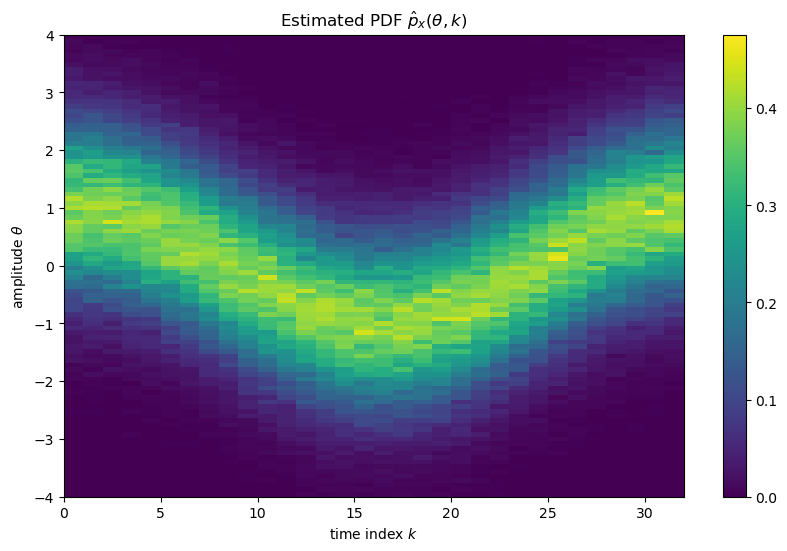

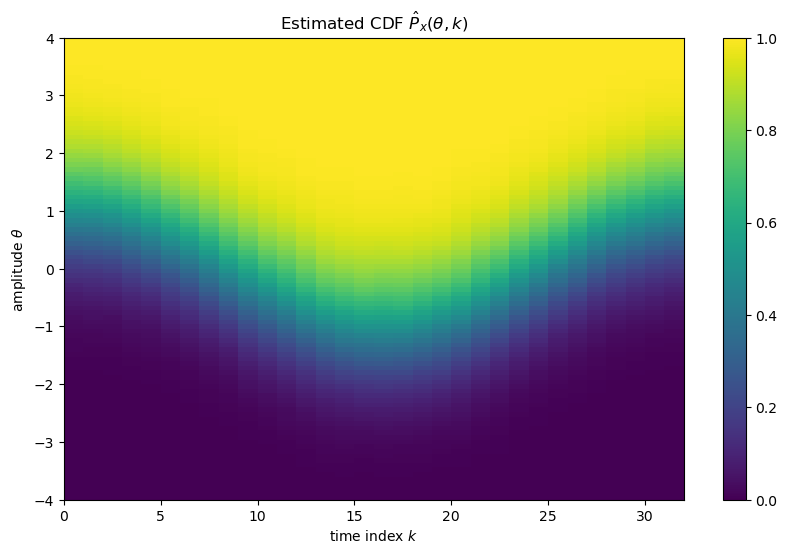

In [1]:
import matplotlib.pyplot as plt
import numpy as np

K = 32  # number of temporal samples
N = 10000  # number of sample functions
bins = 100  # number of bins for the histogram

# draw sample functions from a random process
np.random.seed(2)
x = np.random.normal(size=(N, K))
x += np.tile(np.cos(2*np.pi/K*np.arange(K)), [N, 1])

# compute the histogram
px = np.zeros((bins, K))
for k in range(K):
    px[:, k], edges = np.histogram(
        x[:, k], bins=bins, range=(-4, 4), density=True)

# compute the CDF
Px = np.cumsum(px, axis=0) * 8/bins

# plot the PDF
plt.figure(figsize=(10, 6))
plt.pcolormesh(np.arange(K+1), edges, px)
plt.title(r'Estimated PDF $\hat{p}_x(\theta, k)$')
plt.xlabel(r'time index $k$')
plt.ylabel(r'amplitude $\theta$')
plt.colorbar()
plt.autoscale(tight=True)

# plot the CDF
plt.figure(figsize=(10, 6))
plt.pcolormesh(np.arange(K+1), edges, Px, vmin=0, vmax=1)
plt.title(r'Estimated CDF $\hat{P}_x(\theta, k)$')
plt.xlabel(r'time index $k$')
plt.ylabel(r'amplitude $\theta$')
plt.colorbar()
plt.autoscale(tight=True)

**Exercise**

* Change the number of sample functions `N` or/and the number of `bins` and rerun the examples. What changes? Why?

Solution: In numerical simulations of random processes only a finite number of sample functions and temporal samples can be considered. This holds also for the number of intervals (bins) used for the histogram. As a result, numerical approximations of the CDF/PDF will be subject to statistical uncertainties that typically will become smaller if the number of sample functions `N` is increased.

### Bivariate Probability Density Function

The bivariate or joint PDF $p_{xy}(\theta_x, \theta_y, k_x, k_y)$ of two continuous-amplitude real-valued random signals $x[k]$ and $y[k]$ is defined as

\begin{equation}
p_{xy}(\theta_x, \theta_y, k_x, k_y) := \frac{\partial^2}{\partial \theta_x \partial \theta_y} P_{xy}(\theta_x, \theta_y, k_x, k_y).
\end{equation}

This constitutes essentially the generalization of the univariate PDF. The bivariate PDF quantifies the joint probability that $x[k]$ takes the value $\theta_x$ and that $y[k]$ takes the value $\theta_y$ for the entire ensemble of sample functions. Analogous to the univariate case, the bivariate CDF is given by integration

\begin{equation}
P_{xy}(\theta_x, \theta_y, k_x, k_y) = \int\limits_{-\infty}^{\theta_x} \int\limits_{-\infty}^{\theta_y} p_{xy}(\alpha, \beta, k_x, k_y) \, \mathrm{d}\alpha \mathrm{d}\beta.
\end{equation}

Due to the properties of the bivariate CDF and its definition the bivariate PDF shows the following properties

\begin{equation}
p_{xy}(\theta_x, \theta_y, k_x, k_y) \geq 0
\end{equation}

and

\begin{equation}
\iint_{-\infty}^{\infty} p_{xy}(\theta_x, \theta_y, k_x, k_y) \, \mathrm{d}\theta_x \mathrm{d}\theta_y = 1.
\end{equation}

For the special case of considering only one signal but at different times, the bivariate PDF 

\begin{equation}
p_{xx}(\theta_1, \theta_2, k_1, k_2) := \frac{\partial^2}{\partial \theta_1 \partial \theta_2} P_{xx}(\theta_1, \theta_2, k_1, k_2)
\end{equation}

describes the probability that the random signal $x[k]$ takes the values $\theta_1$ at time instance $k_1$ and $\theta_2$ at time instance $k_2$. Hence, $p_{xx}(\theta_1, \theta_2, k_1, k_2)$ provides insights into the temporal dependencies of the amplitudes of the random signal $x[k]$.

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples*.